In [ ]:
import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse


In [7]:

# Parameters

def laplacian(L,N,h): 
    # Create grid
    x = np.linspace(0, L, N)
    y = np.linspace(0, L, N)
    X, Y = np.meshgrid(x, y)

    # Initialize Laplacian matrix
    size = N * N
    M = scipy.sparse.lil_matrix((size, size), dtype=float)

    # Fill Laplacian matrix
    for i in range(N):
        for j in range(N):
            index = i * N + j  # Convert 2D index to 1D
            if i == 0 or i == N - 1 or j == 0 or j == N - 1:
                # Boundary condition: v = 0
                M[index, index] = 1
            else:
                # Interior points
                M[index, index] = -4 / h**2
                M[index, index + 1] = 1 / h**2  # Right neighbor
                M[index, index - 1] = 1 / h**2  # Left neighbor
                M[index, index + N] = 1 / h**2  # Top neighbor
                M[index, index - N] = 1 / h**2  # Bottom neighbor

    # Convert to sparse matrix for faster computation
    return M.tocsc()

L = 30  # Side length or diameter
N = 30  # Number of grid points per dimension
h = L / (N - 1)  # Grid spacing


In [8]:
# Initialize results dictionary
results = {"dense": {i: [] for i in range(1, 31)}, "sparse": {i: [] for i in range(1, 31)}}

# Loop over N from 1 to 30
for N in range(1, 31):
    h = L / (N - 1) if N > 1 else L  # Avoid division by zero for N=1
    try:
        # Generate Laplacian matrix
        M = laplacian(L, N, h)

        # Dense computation
        start_time = time.time()
        eigenvalues_dense, eigenvectors_dense = scipy.linalg.eigh(M.toarray())
        dense_time = time.time() - start_time
        results["dense"][N].append(dense_time)

        # Sparse computation
        start_time = time.time()
        eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigs(M, k=6, sigma=0)
        sparse_time = time.time() - start_time
        results["sparse"][N].append(sparse_time)

    except Exception as e:
        print(f"Error for N={N}: {e}")
        results["dense"][N].append(None)
        results["sparse"][N].append(None)

# Save results
print("Computation times saved for N=1 to 30.")


Error for N=1: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Error for N=2: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Computation times saved for N=1 to 30.


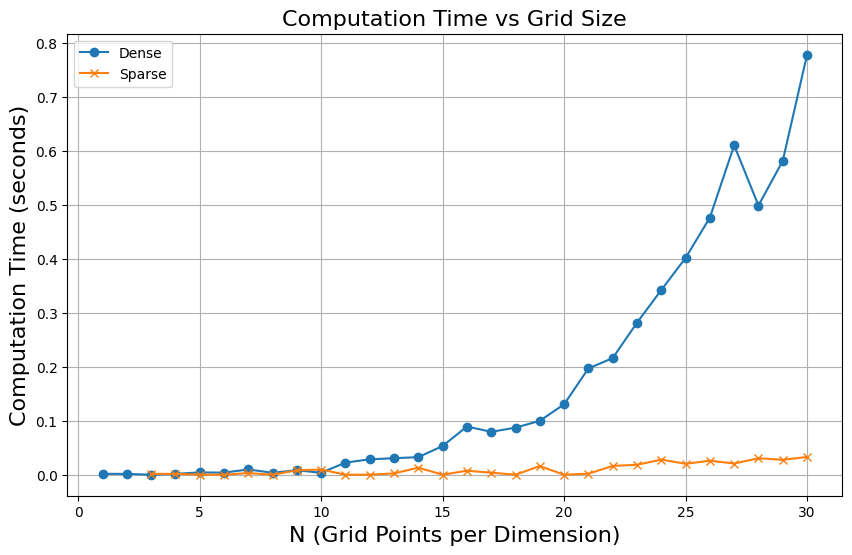

In [9]:
Ns = np.arange(1,31, 1)
# Remove None elements from results
for key in results:
    for n in results[key]:
        results[key][n] = [x for x in results[key][n] if x is not None]
plt.figure(figsize=(10, 6))
plt.plot(Ns, [np.mean(results["dense"][i]) for i in Ns], label="Dense", marker='o')
plt.plot(Ns, [np.mean(results["sparse"][i]) for i in Ns], label="Sparse", marker='x')
plt.xlabel("N (Grid Points per Dimension)", fontsize=16)
plt.ylabel("Computation Time (seconds)", fontsize=16)
plt.title("Computation Time vs Grid Size", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("sparse_vs_dense", dpi =200)
plt.show()


In [ ]:
# Initialize results dictionary
results = {"dense": {i: [] for i in range(1, 101)}, "sparse": {i: [] for i in range(1, 101)}}

N = 100
# Loop over N from 1 to 30
for L in range(1, 100):
    h = L / (N - 1) if N > 1 else L  # Avoid division by zero for N=1
    try:
        # Generate Laplacian matrix
        M = laplacian(L, N, h)

        # Dense computation
        start_time = time.time()
        eigenvalues_dense, eigenvectors_dense = scipy.linalg.eigh(M.toarray())
        dense_time = time.time() - start_time
        results["dense"][L].append(dense_time)

        # Sparse computation
        start_time = time.time()
        eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigs(M, k=6, sigma=0)
        sparse_time = time.time() - start_time
        results["sparse"][L].append(sparse_time)

    except Exception as e:
        print(f"Error for N={N}: {e}")
        results["dense"][L].append(None)
        results["sparse"][L].append(None)

# Save results
print("Computation times saved for L=1 to 30.")


c:\Users\imaan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\imaan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


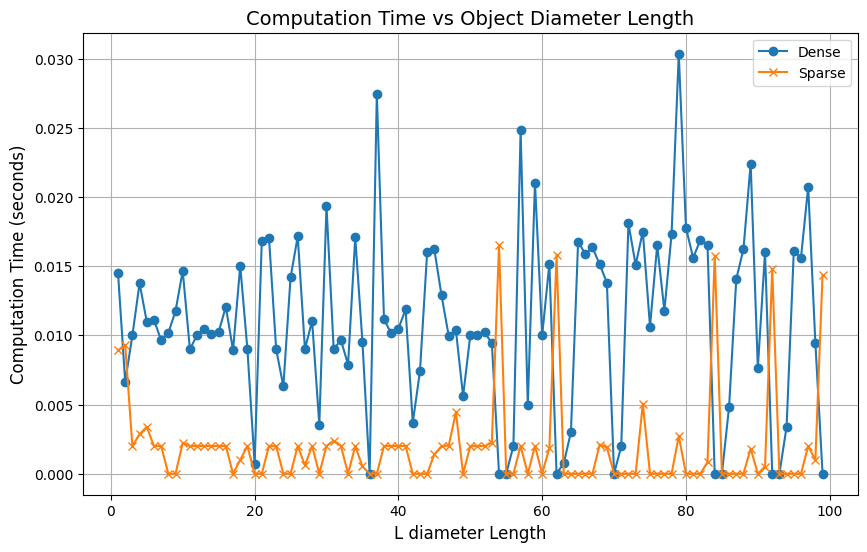

In [ ]:
Ls = np.arange(1,101, 1)
# Remove None elements from results
for key in results:
    for n in results[key]:
        results[key][n] = [x for x in results[key][n] if x is not None]
plt.figure(figsize=(10, 6))
plt.plot(Ls, [np.mean(results["dense"][i]) for i in Ls], label="Dense", marker='o')
plt.plot(Ls, [np.mean(results["sparse"][i]) for i in Ls], label="Sparse", marker='x')
plt.xlabel("L diameter Length", fontsize=12)
plt.ylabel("Computation Time (seconds)", fontsize=12)
plt.title("Computation Time vs Object Diameter Length", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


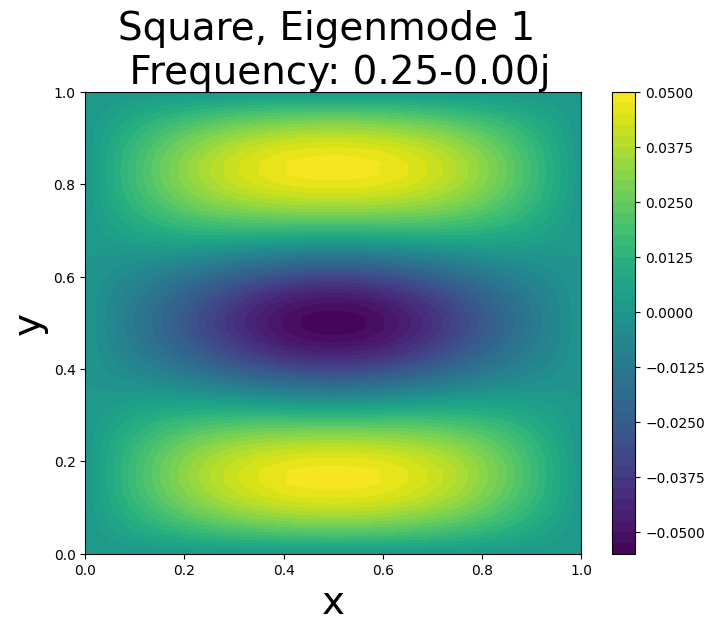

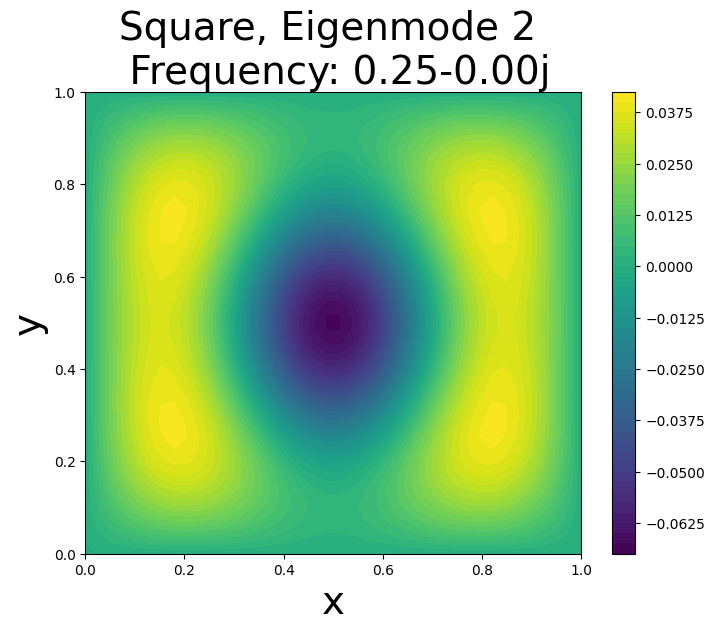

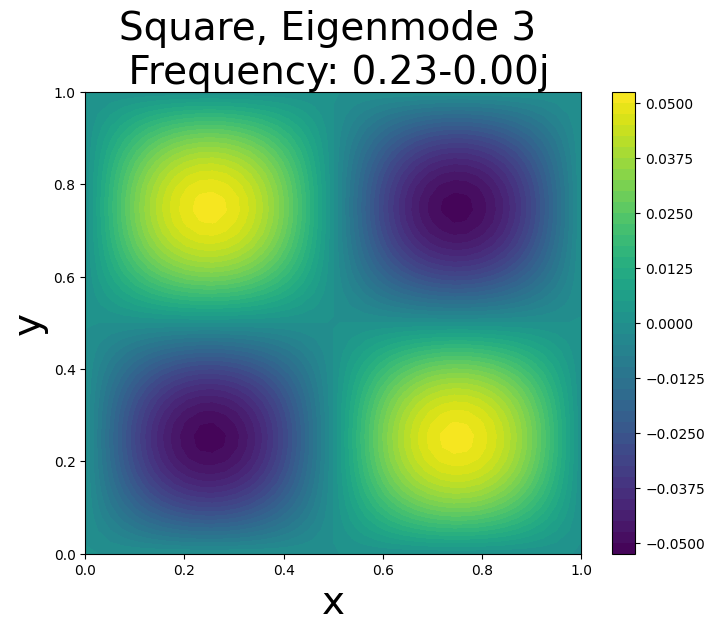

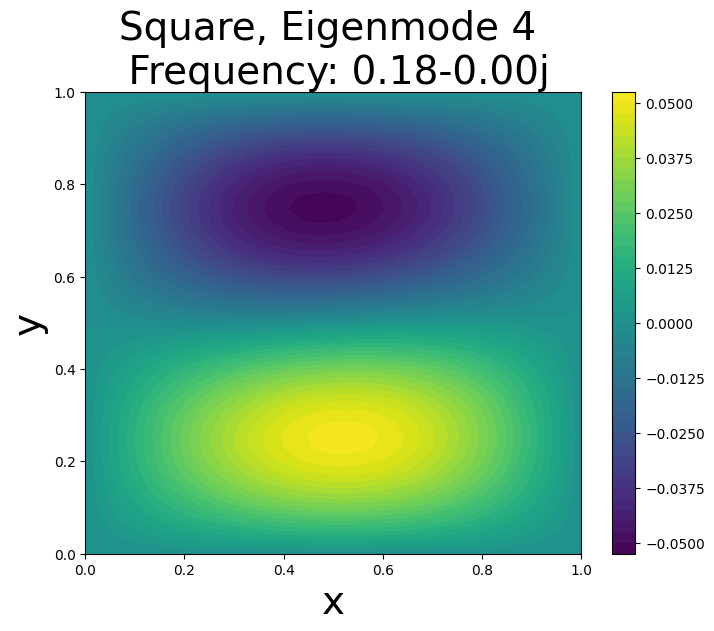

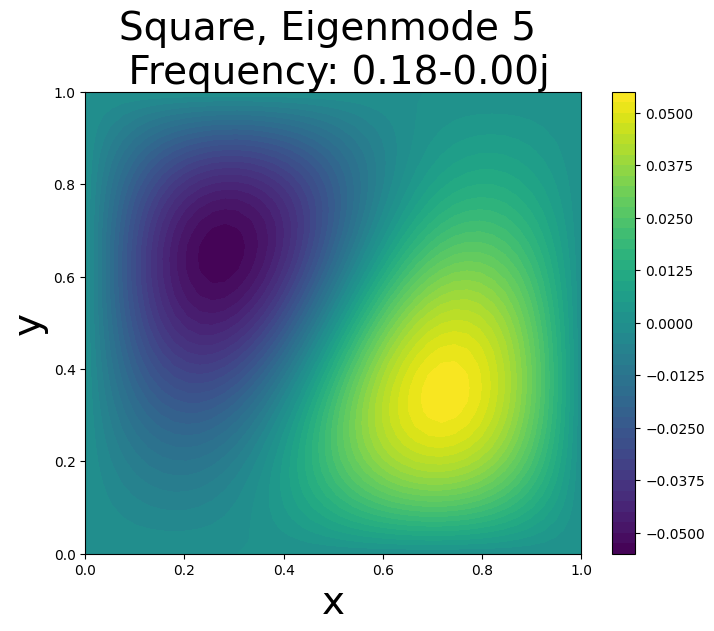

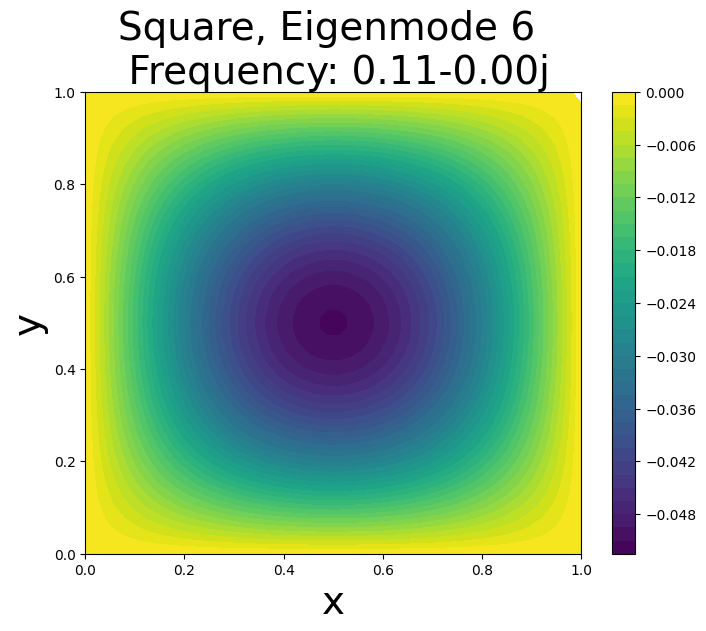

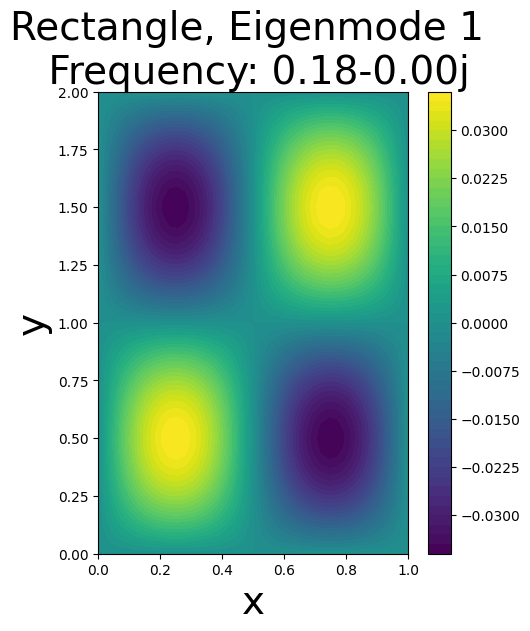

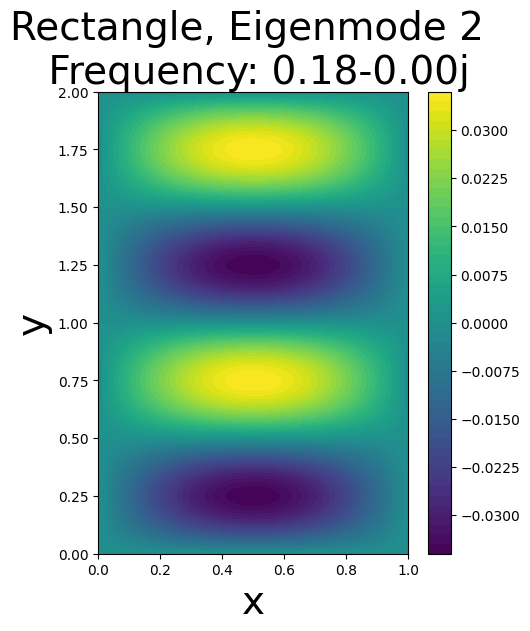

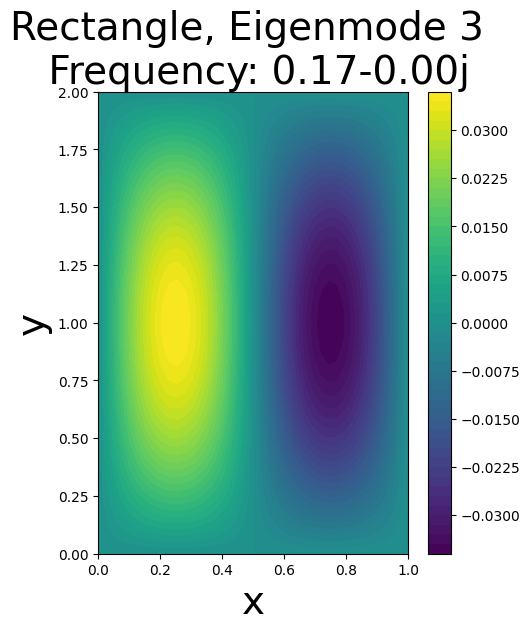

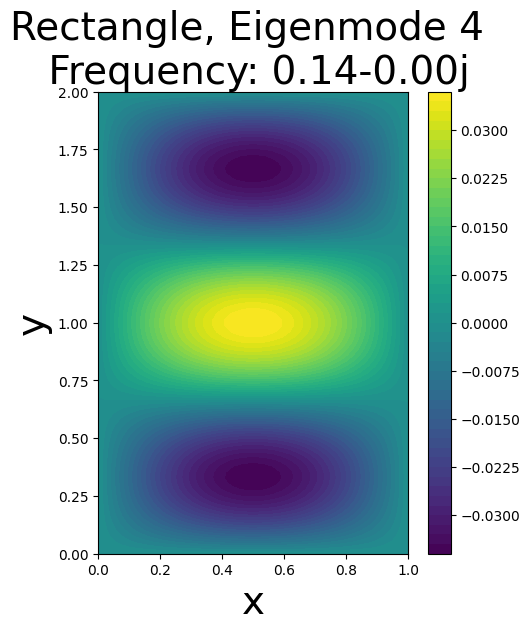

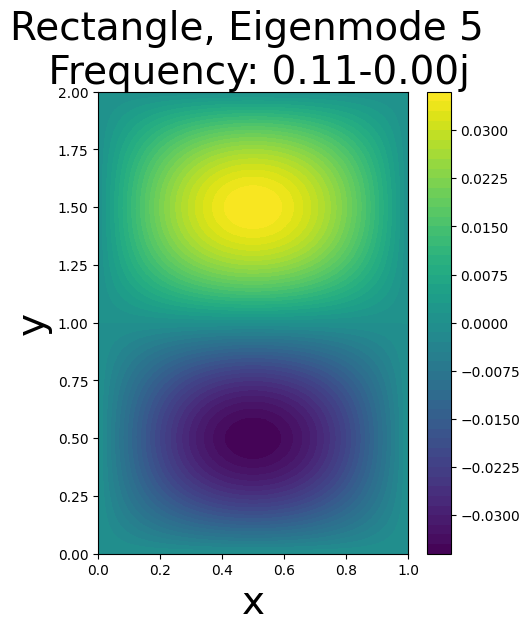

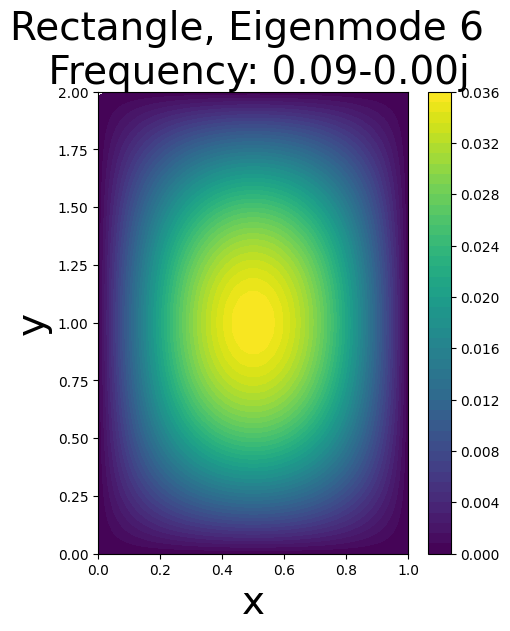

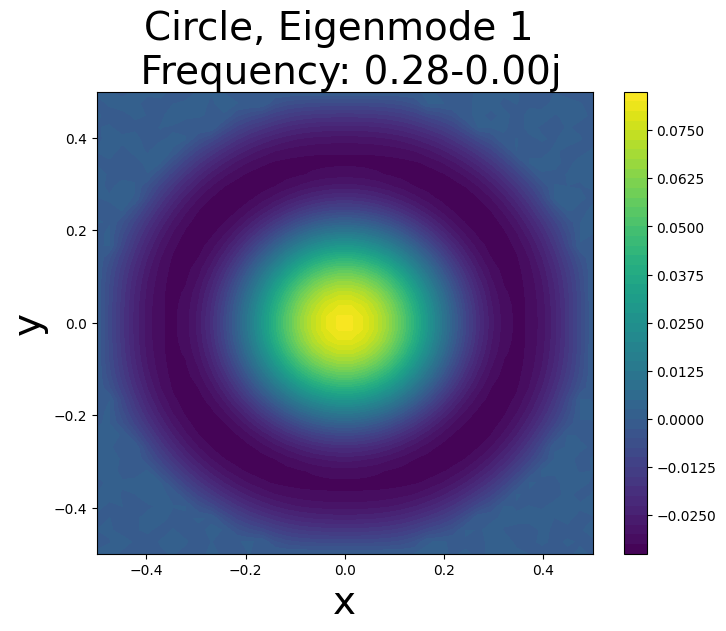

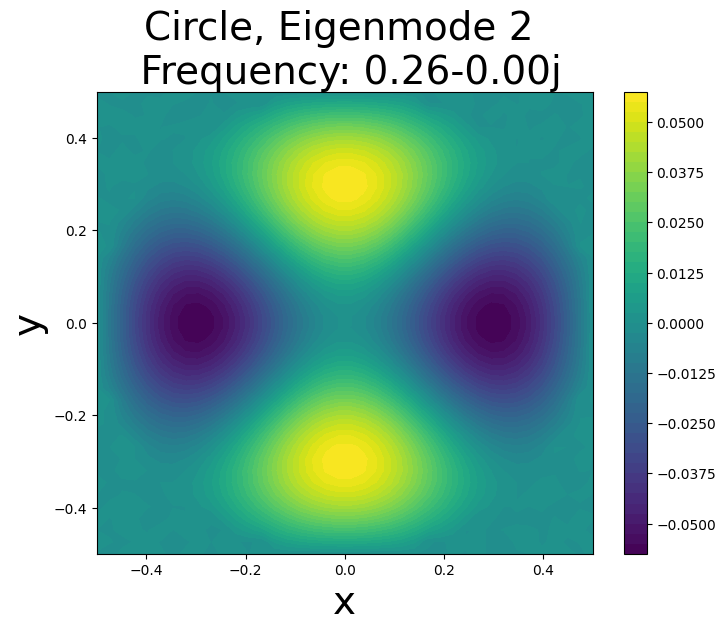

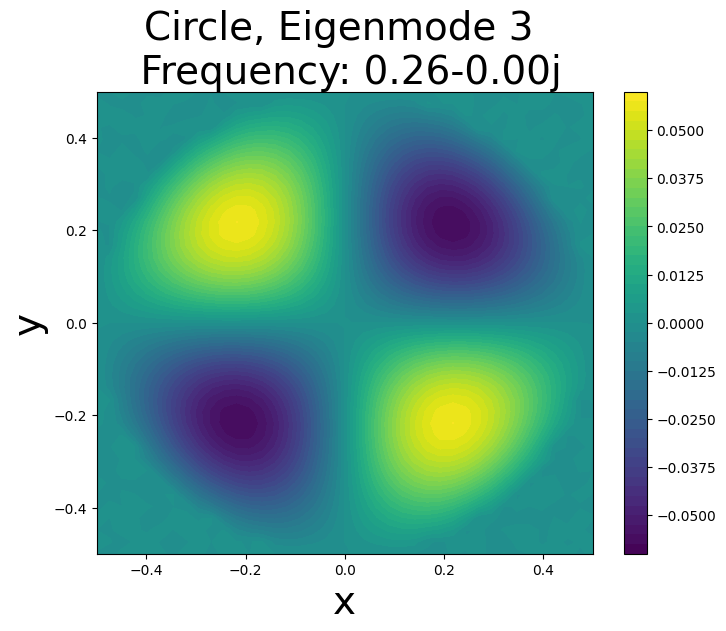

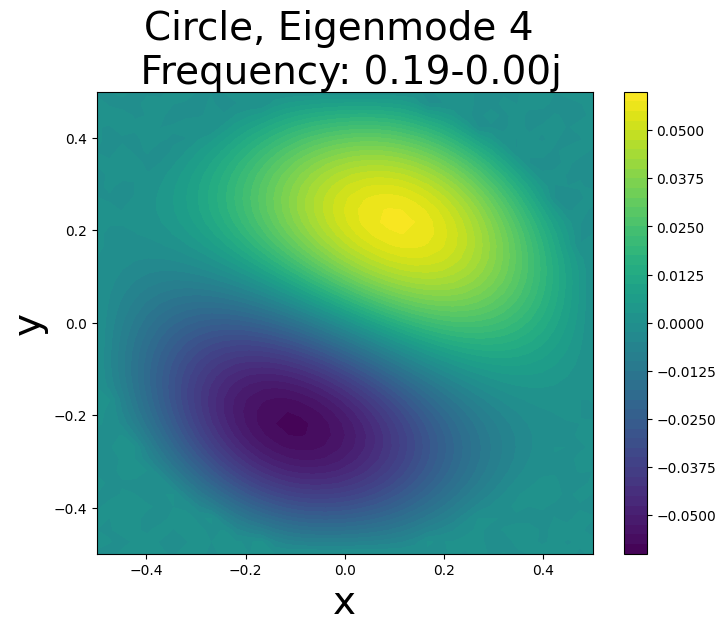

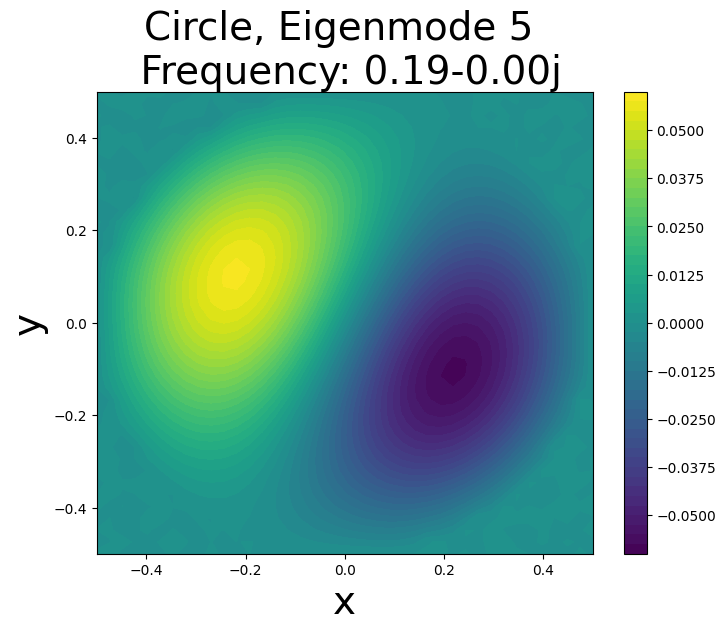

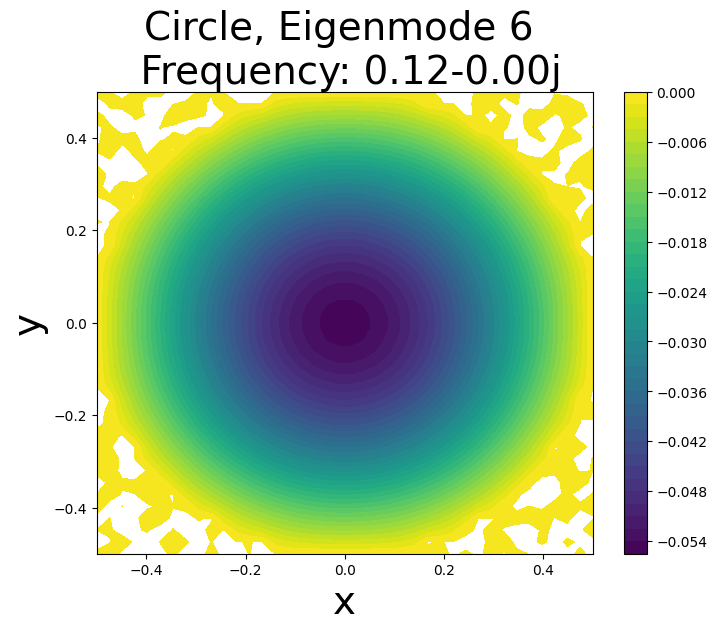

(array([-0.07738764+0.j, -0.06728615+0.j, -0.06678333+0.j, -0.03738836+0.j,
        -0.03738836+0.j, -0.0147493 +0.j]),
 array([[-3.40144249e-20+0.j, -6.62001589e-19+0.j, -6.55422826e-19+0.j,
          2.82455823e-20+0.j, -4.58429385e-21+0.j, -4.09234749e-19+0.j],
        [-3.42045271e-19+0.j, -1.40930974e-17+0.j, -1.30245736e-17+0.j,
         -2.85736867e-19+0.j,  4.22431648e-20+0.j, -1.00270272e-17+0.j],
        [ 1.58884804e-20+0.j, -7.03336092e-19+0.j, -6.68508711e-19+0.j,
          5.70020383e-21+0.j, -7.78857592e-22+0.j, -4.70564690e-19+0.j],
        ...,
        [ 3.83099278e-20+0.j, -3.40900706e-18+0.j, -3.18936081e-18+0.j,
          2.26943893e-19+0.j, -3.89662353e-20+0.j, -2.10948276e-18+0.j],
        [ 1.33939409e-18+0.j,  1.00115600e-17+0.j,  9.87809007e-18+0.j,
         -2.36027606e-18+0.j,  3.52965907e-19+0.j,  6.41596739e-18+0.j],
        [-5.86790636e-19+0.j,  1.17653734e-17+0.j,  1.04888320e-17+0.j,
          1.37778572e-18+0.j, -2.05207424e-19+0.j,  5.83175311e-18+0.j

In [23]:


def solve_eigenvalue_problem(shape, L, N, plot=True):
    # Create grid
    figsize = (8,6)

    if shape == "square":
        x = np.linspace(0, L, N)
        y = np.linspace(0, L, N)
    elif shape == "rectangle":
        x = np.linspace(0, L, N)
        y = np.linspace(0, 2 * L, 2 * N)
        figsize = (5,6)
    elif shape == "circle":
        x = np.linspace(-L/2, L/2, N)
        y = np.linspace(-L/2, L/2, N)
         
    X, Y = np.meshgrid(x, y)

    # Initialize Laplacian matrix
    size = X.size
    M = scipy.sparse.lil_matrix((size, size), dtype=float)

    # Fill Laplacian matrix
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            index = i * X.shape[1] + j  # Convert 2D index to 1D
            if shape == "circle" and (X[i, j]**2 + Y[i, j]**2 > (L/2)**2):
                # Boundary condition for circle
                M[index, index] = 1
            elif i == 0 or i == X.shape[0] - 1 or j == 0 or j == X.shape[1] - 1:
                # Boundary condition for square and rectangle
                M[index, index] = 1
            else:
                # Interior points
                M[index, index] = -4
                M[index, index + 1] = 1  # Right neighbor
                M[index, index - 1] = 1  # Left neighbor
                M[index, index + X.shape[1]] = 1  # Top neighbor
                M[index, index - X.shape[1]] = 1  # Bottom neighbor

    # Convert to sparse matrix for faster computation
    M = M.tocsc()

    # Solve eigenvalue problem
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(M, k=6, sigma=0)  # Find 6 smallest eigenvalues

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Plot eigenvectors
    for i in range(6):
        v = eigenvectors[:, i].reshape(X.shape)
        plt.figure(figsize=figsize)
        plt.contourf(X, Y, v, levels=50, cmap='viridis')
        plt.colorbar()
        plt.title(f"{shape.capitalize()}, Eigenmode {i+1} \n Frequency: {np.sqrt(-eigenvalues[i]):.2f}", fontsize = 28)
        plt.xlabel("x", fontsize = 28)
        plt.ylabel("y", fontsize = 28)
        plt.savefig(f"{str(shape)}_eigenmode{i}", dpi = 300)

            plt.show()
    
    return eigenvalues, eigenvectors

# Parameters
L = 1.0  # Side length or diameter
N = 40  # Number of grid points per dimension

# Solve for each shape
solve_eigenvalue_problem("square", L, N)
solve_eigenvalue_problem("rectangle", L, N)
solve_eigenvalue_problem("circle", L, N)

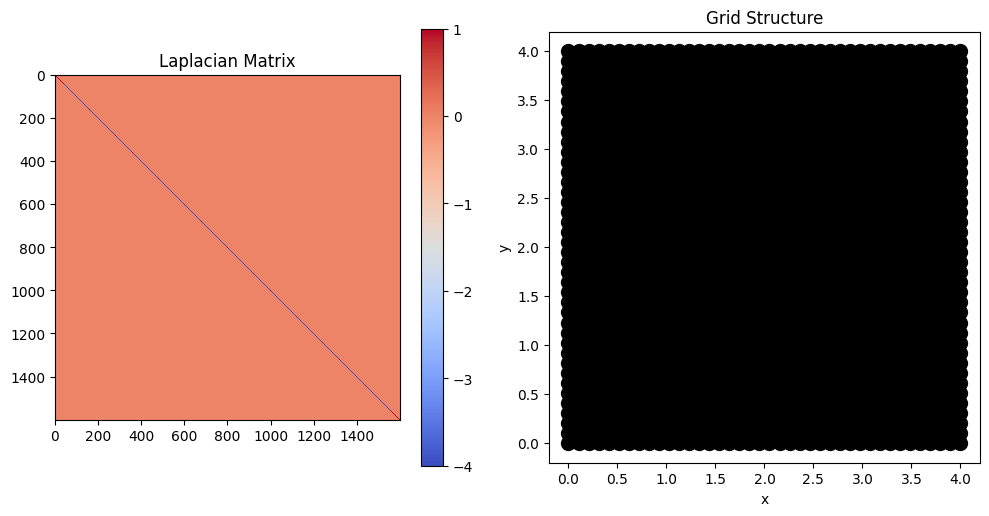

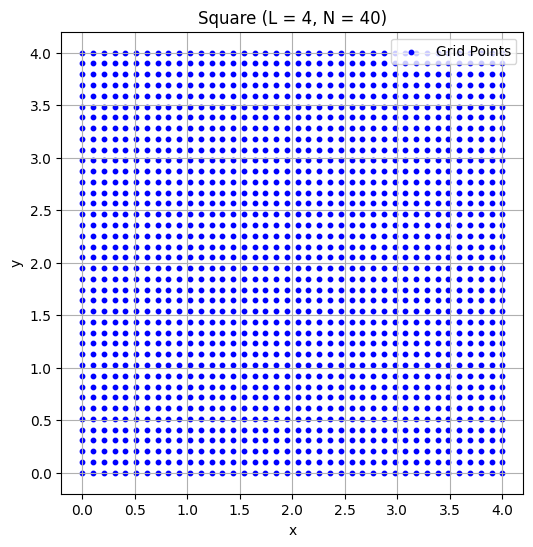

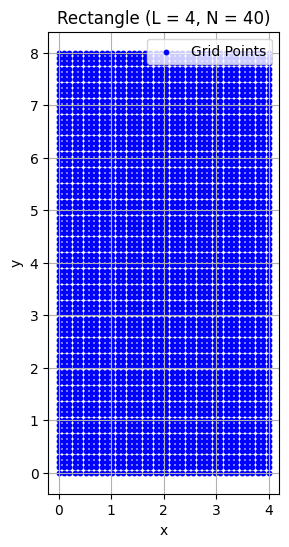

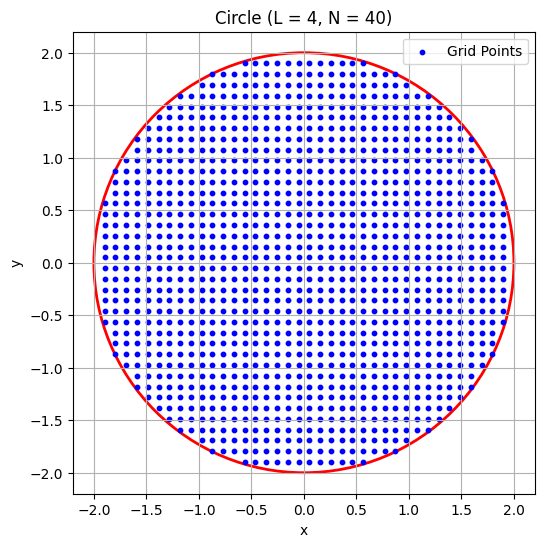

In [ ]:


def plot_laplacian(N):
    """
    Plots the Laplacian matrix and the grid structure for an N x N grid.

    Parameters:
        N (int): Number of grid points per dimension.
    """
    # Create grid
    x = np.linspace(0, 4, N)
    y = np.linspace(0, 4, N)
    X, Y = np.meshgrid(x, y)

    # Initialize Laplacian matrix
    size = N * N
    M = scipy.sparse.lil_matrix((size, size), dtype=float)

    # Fill Laplacian matrix
    for i in range(N):
        for j in range(N):
            index = i * N + j  # Convert 2D index to 1D
            if i == 0 or i == N - 1 or j == 0 or j == N - 1:
                # Boundary condition: v = 0
                M[index, index] = 1
            else:
                # Interior points
                M[index, index] = -4
                M[index, index + 1] = 1  # Right neighbor
                M[index, index - 1] = 1  # Left neighbor
                M[index, index + N] = 1  # Top neighbor
                M[index, index - N] = 1  # Bottom neighbor

    # Convert to dense matrix for visualization
    M_dense = M.toarray()

    # Plot Laplacian matrix
    plt.figure(figsize=(10, 5))

    # Plot 1: Laplacian matrix
    plt.subplot(1, 2, 1)
    plt.imshow(M_dense, cmap='coolwarm', interpolation='none')
    plt.title("Laplacian Matrix")
    plt.colorbar()

    # Plot 2: Grid structure
    plt.subplot(1, 2, 2)
    for i in range(N):
        for j in range(N):
            # Plot grid points
            plt.plot(X[i, j], Y[i, j], 'ko', markersize=10)
            # Plot connections to neighbors
            if i < N - 1:
                plt.plot([X[i, j], X[i + 1, j]], [Y[i, j], Y[i + 1, j]], 'k-')  # Bottom neighbor
            if j < N - 1:
                plt.plot([X[i, j], X[i, j + 1]], [Y[i, j], Y[i, j + 1]], 'k-')  # Right neighbor

    plt.title("Grid Structure")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.savefig("laplacian_and_grid", dpi = 300)
    plt.show()

def plot_original_object(shape, L, N):
    """
    Plots the original object (square, rectangle, or circle) on a grid.

    Parameters:
        shape (str): Shape of the object ("square", "rectangle", or "circle").
        L (float): Side length or diameter of the object.
        N (int): Number of grid points per dimension.
    """
    # Create grid
    if shape == "square":
        x = np.linspace(0, L, N)
        y = np.linspace(0, L, N)
    elif shape == "rectangle":
        x = np.linspace(0, L, N)
        y = np.linspace(0, 2 * L, 2 * N)
    elif shape == "circle":
        x = np.linspace(-L/2, L/2, N)
        y = np.linspace(-L/2, L/2, N)
    X, Y = np.meshgrid(x, y)

    # Plot the object
    plt.figure(figsize=(6, 6))
    if shape == "circle":
        # Plot the circle boundary
        circle = plt.Circle((0, 0), L/2, edgecolor='r', facecolor='none', linewidth=2)
        plt.gca().add_patch(circle)
        # Plot grid points inside the circle
        inside_circle = X**2 + Y**2 <= (L/2)**2
        plt.scatter(X[inside_circle], Y[inside_circle], c='b', s=10, label="Grid Points")
    else:
        # Plot grid points for square or rectangle
        plt.scatter(X, Y, c='b', s=10, label="Grid Points")

    plt.title(f"{shape.capitalize()} (L = {L}, N = {N})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
L = 4  # Side length or diameter
N = 40   # Number of grid points per dimension

# Plot Laplacian and grid structure for a 4x4 grid
plot_laplacian(N)

# Plot original objects
plot_original_object("square", L, N)
plot_original_object("rectangle", L, N)
plot_original_object("circle", L, N)

### Spectrum of eigenfrequencies 

In [5]:
M = 25
N = 20
Ls = np.array(range(1,M))
results_sq = []
results_rec = []
results_circ = []
for L in Ls:
    eigenfrequencies_sq, eigenmodus_sq = solve_eigenvalue_problem("square", L, N*L, plot=False)
    eigenfrequencies_rec, eigenmodus_rec = solve_eigenvalue_problem("rectangle", L, N*L, plot=False)
    eigenfrequencies_circ, eigenmodus_circ = solve_eigenvalue_problem("circle", L, N*L, plot=False)

    results_sq.append(eigenfrequencies_sq)
    results_rec.append(eigenfrequencies_rec)
    results_circ.append(eigenfrequencies_circ)
    print("Done with", L)


Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9
Done with 10
Done with 11
Done with 12
Done with 13
Done with 14
Done with 15
Done with 16
Done with 17
Done with 18
Done with 19
Done with 20
Done with 21
Done with 22
Done with 23
Done with 24


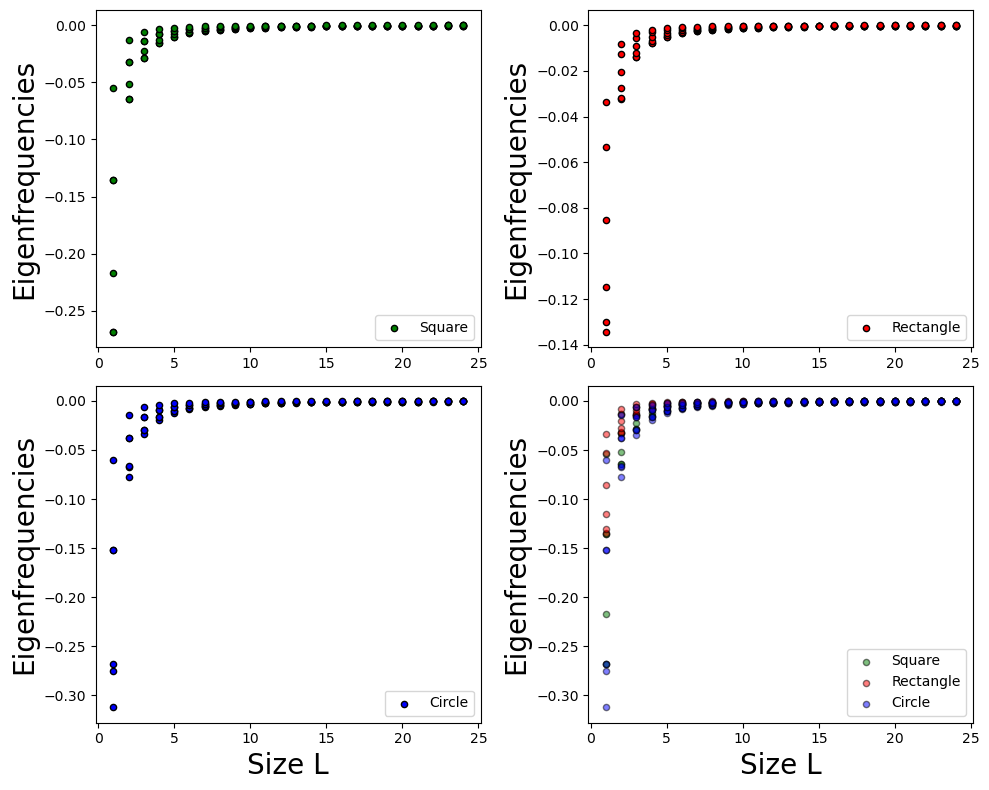

In [18]:
xs_sq = []
xs_rec = []
xs_circ = []

for i,res in enumerate(results_sq):
    x = np.full(len(res),Ls[i])
    xs_sq.append(x)

for i,res in enumerate(results_rec):
    x = np.full(len(res),Ls[i])
    xs_rec.append(x)

for i,res in enumerate(results_circ):
    x = np.full(len(res),Ls[i])
    xs_circ.append(x)    


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Square subplot
axes[0, 0].scatter(xs_sq, results_sq, s=20, color='green', label='Square', alpha=1, edgecolor = 'black')
# axes[0, 0].set_xlabel("Size L",fontsize=20)
axes[0, 0].set_ylabel("Eigenfrequencies", fontsize=20)
# axes[0, 0].set_title("Square", fontsize=25)
axes[0, 0].legend()

# Rectangle subplot
axes[0, 1].scatter(xs_rec, results_rec, s=20, color='red', label='Rectangle', alpha=1, edgecolor = 'black')
# axes[0, 1].set_xlabel("Size L", fontsize=20)
axes[0, 1].set_ylabel("Eigenfrequencies", fontsize=20)
# axes[0, 1].set_title("Rectangle", fontsize=25)
axes[0, 1].legend()

# Circle subplot
axes[1, 0].scatter(xs_circ, results_circ, s=20, color='blue', label='Circle', alpha=1, edgecolor = 'black')
axes[1, 0].set_xlabel("Size L", fontsize=20)
axes[1, 0].set_ylabel("Eigenfrequencies", fontsize=20)
# axes[1, 0].set_title("Circle", fontsize=25)
axes[1, 0].legend()

# Combined plot
axes[1, 1].scatter(xs_sq, results_sq, s=20, color='green', label='Square', alpha=0.5, edgecolor = 'black')
axes[1, 1].scatter(xs_rec, results_rec, s=20, color='red', label='Rectangle', alpha=0.5, edgecolor = 'black')
axes[1, 1].scatter(xs_circ, results_circ, s=20, color='blue', label='Circle', alpha=0.5, edgecolor = 'black')
axes[1, 1].set_xlabel("Size L", fontsize=20)
axes[1, 1].set_ylabel("Eigenfrequencies", fontsize=20)
# axes[1, 1].set_title("All Shapes", fontsize=25)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### 3.2 Direct methods for solving steady state problems

In [19]:
def Make_m(L, N):
    # Create grid
    figsize = (8,6)


    x = np.linspace(-L/2, L/2, N)
    y = np.linspace(-L/2, L/2, N)
         
    X, Y = np.meshgrid(x, y)

    # Initialize Laplacian matrix
    size = X.size
    M = scipy.sparse.lil_matrix((size, size), dtype=float)

    # Fill Laplacian matrix
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            index = i * X.shape[1] + j  # Convert 2D index to 1D
            if (X[i, j]**2 + Y[i, j]**2 > (L/2)**2):
                # Boundary condition for circle
                M[index, index] = 1
            else:
                # Interior points
                M[index, index] = -4
                M[index, index + 1] = 1  # Right neighbor
                M[index, index - 1] = 1  # Left neighbor
                M[index, index + X.shape[1]] = 1  # Top neighbor
                M[index, index - X.shape[1]] = 1  # Bottom neighbor

    # Convert to sparse matrix for faster computation
    M = M.tocsc()

    return M

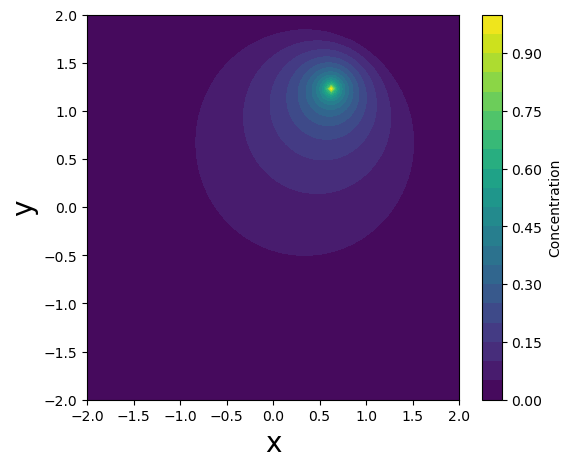

In [22]:
# Solve the system
L = 2
N = 100  # Grid resolution (higher for better accuracy)
num_points = N * N

M = Make_m(L, N)
b = np.zeros(num_points)

# Identify the source point (closest to (0.6, 1.2))
source_x, source_y = (round(N/2 + 0.6/2*N/2), round(N/2 + 1.2/2*N/2))
source_idx = source_y * N + source_x  # Convert (x, y) to 1D index
b[source_idx] = 1  # Set source condition

# Modify M to enforce Dirichlet condition at the source
M = M.tocsc()
M = M.copy()
M[source_idx, :] = 0
M[source_idx, source_idx] = 1

# Solve for concentration
c = scipy.sparse.linalg.spsolve(M, b)

# Convert to grid
C = c.reshape((N, N))  # Use (N, N) instead of (n, n)

# Plot result
x_vals = np.linspace(-2, 2, N)
y_vals = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x_vals, y_vals)

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, C, levels=20, cmap='viridis')
plt.colorbar(label='Concentration')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
# plt.title('Steady-State Diffusion Solution',)
plt.show()